# ZMUM 2: Regresja wieloraka

Prognozowanie cen domów (wiele zmiennych)

W tym notatniku wykorzystamy dane dotyczące sprzedaży domów. Przewidywanie ich ceny zostanie dokonane przy pomocy regresji wielorakiej. Pierwsze zadanie dotyczy eksploracji regresji wielorakiej poprzez opracowanie nowych cech i pomiar błędu. W drugim zadaniu zaimplementować należy algorytm spadku gradientu.

     Użyj wbudowanych funkcji, aby obliczyć współczynniki (wagi) regresji
     Biorąc pod uwagę współczynniki, predyktor i wynik napisz funkcję obliczającą resztkową sumę kwadratów (RSS)
     Spójrz na współczynniki i zinterpretuj ich znaczenie
     Oceń wiele modeli za pomocą RSS

# Potrzebne biblioteki

In [19]:
import pandas as pd
import numpy as np

# Wczytanie danych ceny domów 

Zestaw danych pochodzi ze sprzedaży domów w King County, regionie, w którym znajduje się miasto Seattle w stanie Waszyngton.

In [20]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}
domy = pd.read_csv('kc_house_data.csv',sep=',', dtype=dtype_dict)

In [21]:
domy.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503.0


# Podziel dane na uczące i testowe.
Używamy seed = 0, aby każdy, kto korzysta z tego notebooka, uzyskał te same wyniki. W praktyce możesz ustawić losowy podział.

In [22]:
# Dodanie do macierzy kolumny ze stałą wartością 1 na pierwszej pozycji
def add_const(X):
    X0 = np.ones((len(X), 1))
    X.insert(0, 'const', X0)
    
add_const(domy)  

y = domy['price']
X = domy.drop(['price'], axis=1)
features = X.columns.values
features

array(['const', 'id', 'date', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype=object)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Nauka modelu regresji wielorakiej

Uczymy nasz mode wykorzystując cechy 'sqft_living', 'bedrooms', 'bathrooms'.

In [24]:
example_features = ['const', 'sqft_living', 'bedrooms', 'bathrooms']
pinw = np.linalg.pinv(X_train[example_features])
w = np.dot(pinw,y_train)

Po dopasowaniu modelu możemy wyodrębnić współczynniki (wagi) modelu regresji:

In [25]:
print('Otrzymane współczynniki:', w)

Otrzymane współczynniki: [ 67512.01513809    313.17055038 -56754.66651422   6887.71910816]


# Przewidywanie wartości modelu

Mając wyliczone parametry modelu napisz funkcję do przewidywania wartości dla zadanego modelu

In [26]:
def predict_output(data, w):
    return np.dot(data, w)

predict_output(X_train[example_features], w)

array([395813.49880288, 471910.89304528, 248935.49417374, ...,
       651827.88248964, 596482.9917022 , 601336.62698305])

# Wyliczamy błąd (SSE -  sum of squared estimate of errors)

Teraz, gdy możemy wykonać przewidywanie na podstawie modelu, napiszmy funkcję obliczającą RSS modelu. Wykonaj poniższą funkcję, aby obliczy sumę kwadratów błędu estymacji (SSE) na podstawie modelu, danych i wyniku.

In [27]:
def policz_SSE(model, data, outcome):
    # Wylicz przewidywaną wartość
    y_pred = data.dot(model)
    
    # Policz błąd bezwzglęny
    e = outcome - y_pred
    
    # Podnieś błędy do kwadratu i zsumuj je
    SSE = sum(e * e)
    
    return(SSE)

Przetestuj swoją funkcję obliczając błąd SSE dla danych TEST dla przykładowego modelu:

In [28]:
przykladowe_rss = policz_SSE(w, X_test[example_features], y_test)

print("RSS: %s" % przykladowe_rss)

RSS: 259213572106088.06


# Utwórz nowe cechy

Mimo iż nasz model regresji wielorakiej obejmuje wiele różnych cech (np. ilosc_sypiani, powierzchnia i ilosc_lazienek) możemy również rozważyć przekształcenie istniejących cech, np. log(powierzchnia) czy nawet mnożenie ilości sypialni i łazienek.

Użyjemy funkcji logarytmu, aby utworzyć nowe cechy, więc najpierw należy wczytać odpowiedni pakiet z biblioteki matematycznej.

In [29]:
from math import log

Następnie utwórz następujące 4 nowe cechy jako kolumny w danych TRENINGOWYCH i TESTOWYCH:
* bedrooms_squared = bedrooms\*bedrooms
* bed_bath_rooms = bedrooms\*bathrooms
* log_sqft_living = log(sqft_living)
* lat_plus_long = lat + long 

Jako przykład oto pierwsza:

In [30]:
X_train['bedrooms_squared'] = X_train['bedrooms'].apply(lambda x: x**2)
X_test['bedrooms_squared'] = X_test['bedrooms'].apply(lambda x: x**2)

In [31]:
# utwórz pozostałe 3 funkcje zarówno w danych TRENINGOWYCH, jak i TESTOWYCH

X_train['bed_bath_rooms'] = X_train['bedrooms'] * X_train['bathrooms']
X_test['bed_bath_rooms'] = X_test['bedrooms'] * X_test['bathrooms']

X_train['log_sqft_living'] = X_train['sqft_living'].apply(lambda x: log(x))
X_test['log_sqft_living'] = X_test['sqft_living'].apply(lambda x: log(x))

X_train['lat_plus_long'] = X_train['lat'] +  X_train['long']
X_test['lat_plus_long'] = X_test['lat'] + X_test['long']

* Kwadrat sypialni zwiększa separację między nielicznymi sypialniami (np. 1) i wieloma sypialniami (np. 4), ponieważ 1 ^ 2 = 1, ale 4 ^ 2 = 16. W konsekwencji ta funkcja będzie miała wpływ głównie na domy z wieloma sypialniami.
* Sypialnia razy łazienka daje tak zwaną funkcję „interakcji”. Wynik jest wysoki, gdy  wartości *obu* cech są duże.
* Przejęcie logarytmu stóp kwadratowych powoduje zbliżenie dużych wartości i rozłożenie małych wartości. Wynika to z reguły prawoskośności posiadanych danych/posiadanego atrybutu.
* Dodawanie szerokości do długości geograficznej jest wydaje się całkowicie bezsensowne, ale i tak to zrobimy (zobaczymy później dlaczego)

**Pytanie quizu: Jakie są średnie (średnia arytmetyczna) twoich 4 nowych atrybutów w danych TEST? (w zaokrągleniu do 2 cyfr)**

In [32]:
def argv(x):
    print("Średnia dla atrybutu %s" % round(sum(x)/len(x),2))

argv(X_test['bedrooms_squared'])
argv(X_test['bed_bath_rooms'])
argv(X_test['log_sqft_living'])
argv(X_test['lat_plus_long'])

Średnia dla atrybutu 12.21
Średnia dla atrybutu 7.45
Średnia dla atrybutu 7.55
Średnia dla atrybutu -74.65


# Uczenie wielu modeli

Teraz poznamy wagi trzech (zagnieżdżonych) modeli do przewidywania cen domów. Pierwszy model będzie miał najmniej cech, drugi model powiększymy o jedną cechę, a trzeci doda jeszcze kilka:
* Model 1: squarefeet, # bedrooms, # bathrooms, latitude & longitude
* Model 2: + bedrooms\*bathrooms
* Model 3: + log squarefeet, bedrooms squared, i (bezsensowne) latitude + longitude

<Axes: >

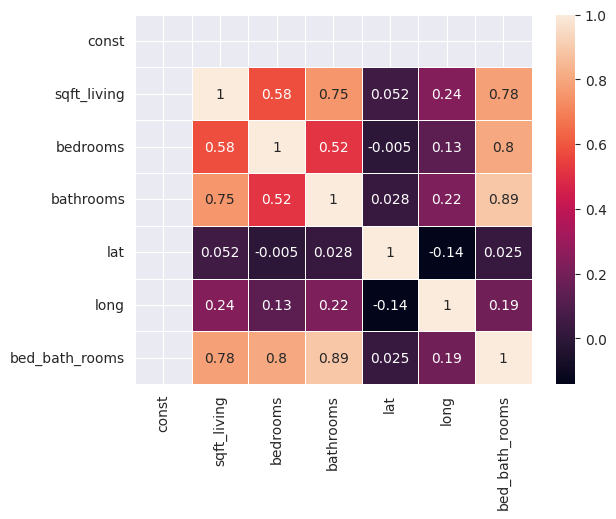

In [36]:
model_1_features = ['const', 'sqft_living', 'bedrooms', 'bathrooms', 'lat', 'long']
model_2_features = model_1_features + ['bed_bath_rooms']
model_3_features = model_2_features + ['bedrooms_squared', 'log_sqft_living', 'lat_plus_long']
import seaborn as sns
sns.heatmap(X_train[model_2_features].corr(), annot=True, linewidths=.5)

Teraz, gdy mamy już cechy, poznaj wagi trzech różnych modeli do przewidywania docelowej „ceny” za pomocą funkcji model_train i spójrz na wartość wag/współczynników:

In [ ]:
# Funkcja szukająca współczynników modelu
def model_train(X_train, Y_train):
    # Wylicz współczynniki modelu wykorzystując pseudoodwrotność
    pinw = np.linalg.pinv(X_train)
    return np.dot(pinw, Y_train)

In [ ]:
# Wyucz 3 modele:
w_1 = model_train(X_train[model_1_features], y_train)
w_2 = model_train(X_train[model_2_features], y_train)
w_3 = model_train(X_train[model_3_features], y_train)

In [ ]:
# Wyświetl wagi współczynników modelu:
print(w_1)
print(w_2)
print(w_3)

**Quiz: Jaki jest znak (dodatni lub ujemny) dla współczynnika/wagi dla „łazienek” w modelu 1?**

**Odpowiedź**

Współczynnik wagi dla *łazienek* w pierwszym modelu jest **dodatni**.

<br>

**Quiz: Jaki jest znak (dodatni lub ujemny) dla współczynnika/wagi dla „łazienek” w modelu 2?**


**Odpowiedź**

Współczynnik wagi dla *łazienek* w drugim modelu jest **ujemny**. 

<br>

**Wnioski**

Współczynnik wagi dla *łazienek* ma inny znak w obu modelach i przyjmuje inne wartości. W pierwszym modelu jego wartość wynosi około 1.48, a w drugim -7.02. Oznacza to różny wpływ tego atrybutu w obu modelach. W drugim modelu *dynamika* tego atrybutu w większym stopniu wpływa na zmienną objaśnianą. Przeprowadzone testy pokazują, że waga atrybutu zależy od tego jakie inne cechy zostały dobrane do modelu.

# Porównywanie wielu modeli

Teraz, gdy otrzymaliśmy trzy modele i wyodrębniliśmy wagi modeli, chcemy ocenić, który model jest najlepszy.

Używając wcześniej opisanych funkcji obliczy SSE dla danych uczących dla każdego z trzech modeli.

In [ ]:
# Policz SSE na danych TRENINGOWYCH dla każdeg z 3 modeli i zapisz wartości:
print(policz_SSE(w_1, X_train[model_1_features], y_train))
print(policz_SSE(w_2, X_train[model_2_features], y_train))
print(policz_SSE(w_3, X_train[model_3_features], y_train))

**Quiz: Który model (1, 2 lub 3) ma najniższy poziom SSE na danych TRENINGOWYCH?** Czy tego się spodziewałeś/-łaś?

**Odpowiedź**

Najniższym poziomem SSE dla danych treningowych charakteryzuje się trzeci model. Można byłoby się spodziewać innych rezultatów patrząc na sposób dobrania atrybutów w przypadku tego modelu, ale widocznie taka selekcja atrybutów pozwala na najlepsze dopasowanie modelu do zbioru uczącego.

Teraz obliczyć SSE na danych TEST dla każdego z trzech modeli.

In [ ]:
from math import sqrt

# Teraz obliczyć SSE na danych TEST dla każdego z trzech modeli i zapisz wartości:
e_test_1 = policz_SSE(w_1, X_test[model_1_features], y_test)
e_test_2 = policz_SSE(w_2, X_test[model_2_features], y_test)
e_test_3 = policz_SSE(w_3, X_test[model_3_features], y_test)

print("RSS: %s" % e_test_1)
print("RSS / liczba mieszkań: %s" % sqrt(e_test_1/len(y_test)))

print("RSS: %s" % e_test_2)
print("RSS / liczba mieszkań: %s" % sqrt(e_test_2/len(y_test)))

print("RSS: %s" % e_test_3)
print("RSS / liczba mieszkań: %s" % sqrt(e_test_3/len(y_test)))

**Quiz: Który model (1, 2 lub 3) ma najniższy poziom SSE na danych TESTOWYCH?** Czy tego się spodziewałeś/-łaś? Pomyśl o cechach, które zostały dodane do każdego z modeli.

**Odpowiedź**

Najniższym poziomem SSE dla danych testowych charakteryzuje się **trzeci model**, co tylko pozornie odbiega od spodziewanych rezultatów. Mogłoby się wydawać, że atrybuty użyte w ostatnim z modeli zostały dobrane losowo bez żadnego uzasadnienia teoretycznego. Niemniej jednak, jest to związane z regułami leżącym u podstaw technik regresyjnych, które nie dowodzą istnienia związku przyczynowego relacji, a jedynie faktu istnienia takiej relacji. Dodatkowo trzeci model charakteryzuje się najmnieszą wartością SSE dla danych treningowych, co dododatkowo potwierdza jego prawdopodobieństwo prawidłowej estymacji na tle innych modeli.

# Policz pochodną

Przejdziemy teraz do obliczania pochodnej funkcji kosztu regresji. Przypomnij sobie, że funkcja kosztu jest sumą kwadratów różnic między punktami danych a przewidywanym wynikiem.

Ponieważ pochodna sumy jest sumą pochodnych, możemy obliczyć pochodną dla pojedynczego punktu danych, a następnie wyznaczyć sumę na podstawie punktów danych. Możemy zapisać kwadrat różnicy między obserwowanym a przewidywanym wynikiem dla pojedynczego punktu w następujący sposób:

(w[0]\*[CONSTANT] + w[1]\*[cecha_1] + ... + w[i] \*[cecha_i] + ... +  w[k]\*[cecha_k] - output)^2

Gdzie mamy *k* cech i stałą. Tak więc pochodną w odniesieniu do wagi w[i] według reguły łańcucha jest:

2\*(w[0]\*[CONSTANT] + w[1]\*[cecha_1] + ... + w[i] \*[cecha_i] + ... +  w[k]\*[cecha_k] - output)\* [cecha_i]

Pojęcie w nawiasach to tylko błąd (różnica między prognozowaniem a wyjściem). Możemy więc ponownie napisać to jako:

2\*error\*[cecha_i]

Oznacza to, że pochodną wagi cechy *i-tej* jest suma (ponad punkty danych) 2-krotności iloczynu błędu i samej cechy. W przypadku stałej jest to tylko dwukrotność sumy błędów!

Przypomnijmy, że dwukrotność sumy iloczynu dwóch wektorów jest tylko dwukrotnością iloczynu dwóch wektorów. Dlatego pochodna wagi dla *cechy_i* jest tylko dwukrotnością iloczynu między wartościami *cechy_i* a bieżącymi błędami.

Mając to na uwadze, należy wyznaczyć funkcję, która oblicza pochodną współczynnika na podstawie wartości cechy (we wszystkich punktach danych) i błędów (we wszystkich punktach danych).

In [ ]:
def feature_derivative(errors, feature):
    # Oblicz podwojony iloczyn cech i błędów, a następnie zwróć otrzymną wartość
    
    derivative = sum(2 * errors * feature)/len(feature)
    return(derivative)

# Metoda spadku gradientu / gradientu prostego (Gradient Descent)

Teraz napiszemy funkcję, która wykonuje spadek gradientu. Podstawową przesłanką jest prosta. Biorąc pod uwagę punkt początkowy, aktualizujemy bieżące wagi, przesuwając się w kierunku ujemnego gradientu. Przypomnijmy, że gradient jest kierunkiem *wzrostu*, a zatem gradient ujemny jest kierunkiem *spadku* i staramy się *zminimalizować* funkcję kosztu.

Współczynnik, z jakim poruszamy się w kierunku gradientu ujemnego, nazywa się „rozmiarem kroku” - $\alpha$. Zatrzymujemy się, gdy jesteśmy „wystarczająco blisko” rozwiązania optymalnego. Definiujemy to, wymagając, aby wielkość gradientu była mniejsza niż stała „tolerancja” - $\epsilon$.

Mając to na uwadze, wykonaj funkcję spadku gradientu poniżej, używając funkcji pochodnej. Dla każdego kroku zejścia gradientu aktualizujemy wagę każdego współczynnika przed obliczeniem naszych kryteriów zatrzymania.

In [ ]:
from math import sqrt # wywołanie funkcji na wektorze [g[0], g[1], g[2]] daje sqrt(g[0]^2 + g[1]^2 + g[2]^2)

In [ ]:
import numpy as np

In [ ]:
def regression_gradient_descent(feature_matrix, output, initial_weights = np.array([-47000., 1.]), step_size = 7e-10, tolerance = 2.5e8):
    converged = False 
    weights = np.array(initial_weights) # miej pewność, że wagi są typu numpy array
    while not converged:
        # obliczyć prognozy na podstawie feature_matrix i wag za pomocą funkcji predict_output()
        pred_output = predict_output(feature_matrix, weights)
        # wylicz błąd predykcji jako: predict_output - output
        prediction_error = pred_output - output
        gradient_sum_squares = 0 # inicjuj sumę pierwiastków gradientów
        # chociaż nie osiągnęliśmy jeszcze tolerancji, zaktualizuj wagę każdej funkcji
        for i in range(len(weights)): # zapętlenie każdej wagi
            # Przypomnij sobie, że feature_matrix [:, i] to kolumna cech powiązana z wagami[i]
            # obliczyć pochodną dla wagi[i]:
            derivative = feature_derivative(prediction_error, feature_matrix [:, i])
            # dodaj kwadrat wartości pochodnej do sumy kwadratów gradientów (ocena zbieżności) 
            gradient_sum_squares += derivative * derivative
            # odejmij wielkość kroku pomnożoną przez pochodną od bieżącej wagi
            weights[i] = weights[i] - step_size * derivative
        # oblicz pierwiastek kwadratowy z sumy gradientów kwadratów, aby uzyskać wielkość gradientu:
        gradient_magnitude = sqrt(gradient_sum_squares)

        if gradient_magnitude < tolerance:
            converged = True
    return(weights)

Kilka rzeczy, na które należy zwrócić uwagę, zanim zaczniemy korzystać z metody spadku gradientu. Ponieważ gradient jest sumą wszystkich punktów danych i obejmuje iloczyn błędu i wartości cechy, sam gradient będzie bardzo duży, ponieważ cechy są duże (stopy kwadratowe), a wynik jest duży (ceny). Tak więc, chociaż można oczekiwać, że „tolerancja” będzie niewielka, mała jest jedynie zależna od wielkości cechy.

Z podobnych powodów rozmiar kroku będzie znacznie mniejszy niż można się spodziewać, ale dzieje się tak, ponieważ gradient ma tak duże wartości.

# Uruchamianie spadku gradientu jako prostej regresji

Chociaż opadanie gradientu jest zaprojektowane dla regresji wielorakiej, ponieważ stała jest teraz funkcją, możemy użyć funkcji spadku gradientu do oszacowania parametrów prostej regresji na "squarefeet". Następująca komórka ustawia funkcję parametr_macierz, wynik, wagi początkowe i rozmiar kroku dla pierwszego modelu:

In [ ]:
# Napisz funkcję get_numpy_data(train_data, simple_features, my_output) tworzącą zbiory treningowe X_train i y_train
def get_numpy_data(train_data, simple_features, my_output):
    output = np.array(train_data[my_output])
    simple_feature_matrix = np.array(train_data[simple_features])
    return simple_feature_matrix, output

In [ ]:
# Podział zbioru
train_X, test_X = train_test_split(domy, test_size=0.2, random_state=0)

simple_features = ['sqft_living']
my_output = 'price'

(simple_feature_matrix, output) = get_numpy_data(train_X, simple_features, my_output)

simple_feature_matrix = np.insert(simple_feature_matrix, 0, [1] * len(simple_feature_matrix), axis = 1)

Następnie uruchom gradient z powyższymi parametrami.

In [ ]:
w = regression_gradient_descent(simple_feature_matrix, output)
print("Wagi dla gradientu: %s" % w)
print("Wagi dla pseudoodwrotności: %s" % model_train(simple_feature_matrix, output))

Porównaj wagi do tych uzyskanych przy pomocy pseudoodwrotności

**Pytanie quizu: Jaka jest waga sqft_living - drugi element „simple_weights” (w zaokrągleniu do 1 miejsca po przecinku)?**

**Odpowiedź:** Wartość wagi dla atrybutu *sqft_living* wynosi około 259.6 w przypadku metody spadku gradientu dla wybranych parametrów i jest to wartość mniejsza od wartości uzyskanej przy pomocy pseudooodwrotności.

Zobacz jak się zachowuje metoda gradientowa po przeskalowaniu wartości cech:

In [34]:
min_value = min(train_X['sqft_living'])
max_value = max(train_X['sqft_living'])
simple_features = ['sqft_living_norm']

train_X['sqft_living_norm'] = train_X['sqft_living'].apply(lambda x: (x - min_value)/(max_value - min_value))

(simple_feature_matrix, output) = get_numpy_data(train_X, simple_features, my_output)

simple_feature_matrix = np.insert(simple_feature_matrix, 0, [1] * len(simple_feature_matrix), axis = 1)

initial_weights = np.array([-47000., 1.])
step_size = 7e-2
tolerance = 2.5e5

w = regression_gradient_descent(simple_feature_matrix, output, initial_weights, step_size, tolerance)
print("Wagi dla gradientu: %s" % w)

pred_output = predict_output(simple_feature_matrix, w)

NameError: name 'train_X' is not defined

**Wnioski**

Przeskalowanie wartości atrybutów na ściśle określony zakres <0, 1> spowodowało, że waga atrybutu znacząco wzrosła. Jest to spójne z przewidywaniami teoretycznymi, ponieważ mniejsza wartość atrybutu musi zostać przemnożona przez większą wartość wagi, aby uzyskać dużą wartość jaką jest cena mieszkania w analizowanym zbiorze. W ogólnym podejściu skalowanie wartości jest istotnym krokiem budowy modelu, ponieważ pozwala na większą interpretowalność wyników i szybszą zbieżność.